### Brandon Tomlin & Erin Cook
### Text mining Summer 2016
### Project: 
### Predicting player injury from FantasyFootball tweets.

## ------------

### Project layout

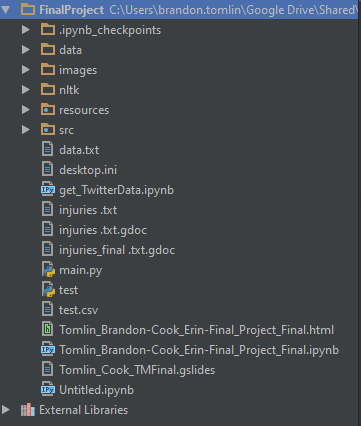

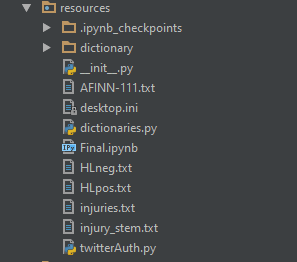

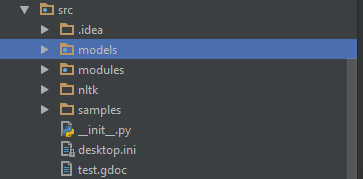

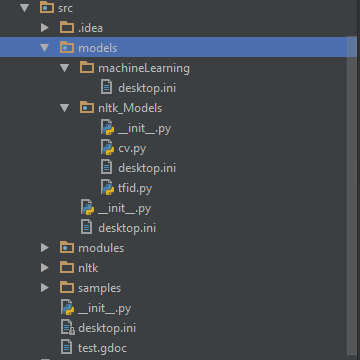

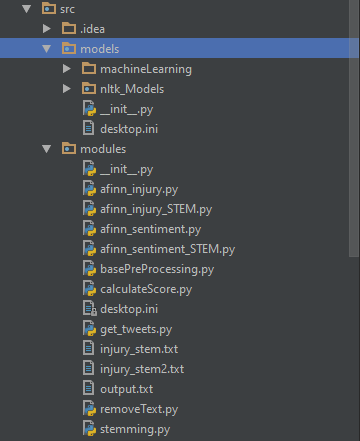

In [138]:
from IPython.display import Image, display

path = "images/layout0.PNG"
display(Image(path))

path = "images/layout1.PNG"
display(Image(path))

path = "images/layout2.PNG"
display(Image(path))

path = "images/layout3.PNG"
display(Image(path))

path = "images/layout4.PNG"
display(Image(path))

In [110]:
import numpy as np

import pandas as pd
import sys 

reload(sys)
sys.setdefaultencoding('utf-8')
import sys
sys.path.insert(0, "src/models/")

### Documentation: 

Gathers tweets and write to a dataframe 

In [111]:
# from resources.twitterAuth import *

from src.modules.get_tweets import consumer_key, consumer_secret   # 1. Contains twitter authentication details. 
from src.modules.get_tweets import twitterAuth                     # 1.1 Excecutes
from src.modules.get_tweets import searchForSearchTerm             # 2. Function calls search term(s) to be search 
from src.modules.get_tweets import toDataFrame                     # 3. Writes data to dataframe
from src.modules.get_tweets import saveToCsv                       # 4. Writes df to csv for later reference. 

api      = twitterAuth(consumer_key, consumer_secret)   # 1. 
searchTerm = '%23FantasyFootball'                               # 2.                    
numberOftweets = 500                                            # 2. 
results  = searchForSearchTerm(api, searchTerm, numberOftweets) # 2.

DataSet  = toDataFrame(results)                 #3.     
filePath = saveToCsv(DataSet, '_FantasyTweets') #4. 

print 'Complete Processing Tweets'

### Documentation: 

Take create a new dataframe after doing some more preprocessing on the last dataframe in number 3. Then we apply modules basePreProcess the do some more UTF-8 tweaking. Then we call module src.modules.removeText to remove our text and another function from src.modules.removeText to process the tweets. Finally we call module resources.dictionaries to remove the words that we set in our dictionary. 

Steps 4.1,5.1,7.1 6.1, and 8.1 exceute those modules and apply it back to our dataset.

In [114]:
filePath = 'C:\\Users\\brandon.tomlin\\Google Drive\\Shared\\Development\\Rockhurst\\TextMining\\FinalProject\\data\\201607141355_FantasyTweets.csv'
#filePath = '/Users/brandontomlin/Google Drive/Shared/Development/Rockhurst/TextMining/FinalProject/data/201607141355_FantasyTweets.csv'


from src.modules.basePreProcessing import createDf       # 4. After doing some preprocessing in 3. creates new df
from src.modules.basePreProcessing import convert        # 5. Converts so its more uft-8 friendly
from src.modules.removeText import multiple_replace      # 6. Removes key terms that we defined. 
from src.modules.removeText import processTweet          # 7. Takes care of more UTF-8 issues. 
from resources.dictionaries import baseParse             # 8. Parse twitter data

df = createDf(filePath)                                                             # 4. 
df['tweetText2'] = convert(df)                                                      # 5.1 
df['tweetText3'] = df['tweetText2'].apply(lambda x: processTweet(x))                # 7.1
df['tweetText5'] = map(lambda x: multiple_replace(baseParse, x), df['tweetText3'])  # 6.1, 8.1

df['tweetText5']

0                                                                   made at_u draft pick 17.05 of ervin, tyler hou rb: url fantasyfootball sfb480
1                                                               made at_u draft pick 13.11 of booker, devontae den rb: url fantasyfootball sfb480
2                                                                 made at_u draft pick 8.02 of stafford, matthew det qb: url fantasyfootball at_u
3                                                   rt at_u better first four picks? rb rb wr wr or wr wr rb rb? nfl football fantasyfootball url
4      we just wrapped up a new episode! stay tuned for the release shortly! we discussed qb and answered questions from twitter! fantasyfootball
5                                                    check out our fantasyfootball draft kit and dominate your competition in 2016! scoutarmy url
6                                    saints favorites to sign free agent anquan boldin nfl fantasyfootball news football fan

### Generate Injury Score and Sentiment Score

### Documentation: 

1. 09 imports the custom injury scoring functions, 10 imports the base sentiment functions

2. 09.1 and 09.2 execute model and writes the output back to our dataframe. 
3. 10.1 and 10.2 execute model and writes the output back to our dataframe. 

In [115]:
from src.modules.afinn_injury import afinn_injury, afinn_injury_nummerical   # 09. imports Player injury scoring mechanism
from src.modules.afinn_sentiment import afinn_sent, afinn_nummerical         # 10. imports sentiment fucntions 

df['afinn_injuries']          = map(lambda x: afinn_injury(x), df['tweetText5'])                # 09.1
df['afinn_injuriesNumerical'] = map(lambda x: afinn_injury_nummerical(x), df['afinn_injuries']) # 09.2

df['afinn_baseSentiment'] = map(lambda x: afinn_sent(x), df['tweetText5'])                       # 10.1
df['afinn_baseNumerical'] = map(lambda x: afinn_nummerical(x), df['afinn_baseSentiment'])        # 10.2

def compositeScore(col1,col2):         # This creates the compositeScore by using adding the two scores together. 
    a = np.array(col1)  
    b = np.array(col2)
    score = a+b
    return score

df['score'] = compositeScore(df['afinn_injuriesNumerical'], df['afinn_baseNumerical'])  # executes compositeScore function

df.head()

,tweetID,source,sourceURL,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,...,tweetSource,tweetCreated,tweetText2,tweetText3,tweetText5,afinn_injuries,afinn_injuriesNumerical,afinn_baseSentiment,afinn_baseNumerical,score
0,753664030938689536,MyFantasyLeague.com,http://www.myfantasyleague.com/,1029010975,kentd99,Kent Dougall ﻦ,2012-12-22 18:13:55,"Life is much better than I deserve. Lk 9:23 Blessed husband and father, fantasy football, duck hunter, friend of Bill",719,651,...,MyFantasyLeague.com,2016-07-14 18:54:42,"made @MyFantasyLeague draft pick 17.05 of Ervin, Tyler HOU RB: https://t.co/D2PyGprKOy #fantasyfootball #SFB480","made AT_USER draft pick 17.05 of ervin, tyler hou rb: URL fantasyfootball sfb480","made at_u draft pick 17.05 of ervin, tyler hou rb: url fantasyfootball sfb480",Not Classified,0,Neutral,0,0
1,753664011774853120,MyFantasyLeague.com,http://www.myfantasyleague.com/,1437545924,RFLRedZone,Mike Valverde,2013-05-18 06:11:10,A #FantasyFootball Godfather. Contributor @TheJetPress Member @FSWA Ranker and Correspondent @FantasyPros,1084,761,...,MyFantasyLeague.com,2016-07-14 18:54:37,"made @MyFantasyLeague draft pick 13.11 of Booker, Devontae DEN RB: https://t.co/ZmqfT5cXQd #fantasyfootball #SFB480","made AT_USER draft pick 13.11 of booker, devontae den rb: URL fantasyfootball sfb480","made at_u draft pick 13.11 of booker, devontae den rb: url fantasyfootball sfb480",Not Classified,0,Neutral,0,0
2,753663864802279424,MyFantasyLeague.com,http://www.myfantasyleague.com/,526839858,Spegg73,Scott Eggleston,2012-03-16 22:07:13,Is it football season yet? Contributer to http://t.co/8bZiRnfEJx,296,428,...,MyFantasyLeague.com,2016-07-14 18:54:02,"made @MyFantasyLeague draft pick 8.02 of Stafford, Matthew DET QB: https://t.co/1wgHlROwRw #fantasyfootball @Staff_9","made AT_USER draft pick 8.02 of stafford, matthew det qb: URL fantasyfootball AT_USER","made at_u draft pick 8.02 of stafford, matthew det qb: url fantasyfootball at_u",Not Classified,0,Neutral,0,0
3,753663694911971328,Twitter for iPhone,http://twitter.com/download/iphone,734004515142258689,jackiepoo77777,Jack Wheeler,2016-05-21 12:54:48,College Basketball College Football NHL Sports NBA NFL,30,125,...,Twitter for iPhone,2016-07-14 18:53:21,RT @fantasyfbtalk_: Better first four picks?\r\nRB RB WR WR or WR WR RB RB?\r\n#NFL #Football #FantasyFootball https://t.co/cHjQ9KH421,rt AT_USER better first four picks? rb rb wr wr or wr wr rb rb? nfl football fantasyfootball URL,rt at_u better first four picks? rb rb wr wr or wr wr rb rb? nfl football fantasyfootball url,Not Classified,0,Negative,-1,-1
4,753663623973703680,Hootsuite,http://www.hootsuite.com,3313528626,TheFumblers,The Fantasy Fumblers,2015-08-12 17:21:00,Fantasy football advice from two dudes who've never won a championship! You'd be wise to ignore us! Hosted by @Stephenkjanes and @TyLeisher,13,2,...,Hootsuite,2016-07-14 18:53:05,We just wrapped up a new episode! Stay tuned for the release shortly! We discussed QB and answered questions from twitter! #fantasyfootball,we just wrapped up a new episode! stay tuned for the release shortly! we discussed qb and answered questions from twitter! fantasyfootball,we just wrapped up a new episode! stay tuned for the release shortly! we discussed qb and answered questions from twitter! fantasyfootball,Not Classified,0,Neutral,0,0


###  Checking for errors
Since we are out of season, mining tweets that contained information about important player info was difficult to find with a limited call. So we created our own data set to test the functionality of the scoring system.

In [116]:
df1 = pd.DataFrame()
test_text = ['Damnit, my quarterback hyperextended his elbow last night.',
            'That player really blew his knee out this week.',
            '50 suffered a bad concussion today.',
            'I cant believe he twisted his ankle again this week.',
            'That player pulled his ACL hardcore.',  
            'My runningback sprained his ankle and is hurt for the next few games.',
            'My quarterback dislocated his finger damnit.',  
            'Two of my players got injured this week.',  
            'You know it is a rough game when two players bumped into each other and 50 lacerated his kidney @NFLFantasy.',
            'That wide receiver tore the hell out of his ACL last night.',  
            'Cant believe my best player got hurt and broke his leg this week.',
            '70 tweaked the hell out of his ankle.',  
            'shoot, my boy dislocated his elbow last night.',  
            'dang, that quarterback twisted his ankle and suffered a concussion.',
            'wow he got really hurt tonight and ruptured his Achilles tendon.',
            'crap my wide receiver broke his arm last night.',  
            'My player was injured and tore his ACL.',  
            'what the hell, he sprained both ankles.',  
            'my man gashed his leg wide open and is injured this week.',  
            'that boy really bruised himself up this week when he bumped into that player.',
            'cant believe that quarterback dislocated his finger again.',  
            'my runningback is hurt this week after he tweaked his ankle.',  
            'holy shit that player gashed his knee up badly.',  
            'that player pulled his hamstring hardcore yo.',
            'damnit, my runningback broke his leg and twisted his left ankle. @NFLFantasy.',
            'he really sprained his back this week.',  
            'shoot, my man bruised himself up this week and gashed his leg open.',  
            'I cant believe he fucked his knew up so badly.',
            'he dislocated his elbow for the second week in a row.',  
            'that player hurt himself when he bumped into 77.',  
            'that wide receiver tore his other ACL.',  
            'my man twisted both ankles this week.',  
            'my favorite player broke his arm after making a catch.',
            'my best player sprained back this week.',  
            'that player hyperextended his knee today.',  
            'why do my runningbacks keep getting hurt? ',
            'my boy suffered a concussion and twisted his ankle today @NFLfantasy.',  
            'the quarterback blew his knee out after being tackled last night.',  
            'my wide receiver gashed his leg open and tweaked his ankle.',  
            'my runningback scraped his arm up really bad today.',  
            'he suffered a bad concussion and damaged his helmet today.',  
            'that player tore the hell out of his knee.',
            'my man scraped his arm up pretty bad on that dudes helmet today.',  
            'I cant believe my best player is hurt and tore ligaments yesterday.',  
            'he gashed his head open today and is injured.',  
            'my main player pulled his hamstring today.',  
            'my quarterbacks finger was dislocated and he broke his wrist.',  
            'that dude fucked up his arm today.',  
            'my boy blew his knew out last night.',  
            'Player 55 damaged some nerves today and is really hurt.',  
            'that guy ruptured his knee cap during the game.']

df1['text'] = test_text 
df1['afinn_injuries']          = map(lambda x: afinn_injury(x), df1['text'])
df1['afinn_injuriesNumerical'] = map(lambda x: afinn_injury_nummerical(x),  df1['afinn_injuries'] )
df1['afinn_baseSentiment']     = map(lambda x: afinn_sent(x), df1['text'])
df1['afinn_baseNumerical']     = map(lambda x: afinn_nummerical(x), df1['afinn_baseSentiment'])

def compositeScore(col1,col2):
    a = np.array(col1)
    b = np.array(col2)
    score = a+b
    return score

df1['score'] = compositeScore(df1['afinn_injuriesNumerical'], df1['afinn_baseNumerical'])
df1

,text,afinn_injuries,afinn_injuriesNumerical,afinn_baseSentiment,afinn_baseNumerical,score
0,"Damnit, my quarterback hyperextended his elbow last night.",Bad,-2,Neutral,0,-2
1,That player really blew his knee out this week.,Bad,-2,Neutral,0,-2
2,50 suffered a bad concussion today.,Bad,-2,Positive,1,-1
3,I cant believe he twisted his ankle again this week.,Bad,-2,Neutral,0,-2
4,That player pulled his ACL hardcore.,Bad,-2,Neutral,0,-2
5,My runningback sprained his ankle and is hurt for the next few games.,Injured,-3,Positive,1,-2
6,My quarterback dislocated his finger damnit.,Injured,-3,Neutral,0,-3
7,Two of my players got injured this week.,Injured,-3,Positive,1,-2
8,You know it is a rough game when two players bumped into each other and 50 lacerated his kidney @NFLFantasy.,Injured,-3,Neutral,0,-3
9,That wide receiver tore the hell out of his ACL last night.,Injured,-3,Positive,1,-2


### Create STEM and add it to data frame

In [117]:
df['tweetText5']   = map(lambda x: x.decode('latin1').encode('utf-8', 'ignore'), df['tweetText5'])
df['prepStemText'] = map(lambda x: x.decode('latin-1').encode('ascii','ignore'), df['tweetText5'])

stemlistP = []

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
for row in df['prepStemText']:
    text = row.split()
    stemtext = [ps.stem(word) for word in text]
    stem2text = [' '.join(stemtext)]
    stemlistP += stem2text
    
df['stemTextPorter'] = stemlistP
df['stemTextPorter'] = map(lambda x: x.decode('latin1').encode('utf-8', 'ignore'), df['stemTextPorter'])
df['stemTextPorter'] = map(lambda x: x.decode('latin-1').encode('ascii','ignore'), df['stemTextPorter'])

stemlistSS = []
from nltk.stem import SnowballStemmer
ss = SnowballStemmer("english")
for row in df['prepStemText']:
    text = row.split()
    stemtext = [ss.stem(word) for word in text]
    stem2text = [' '.join(stemtext)]
    stemlistSS += stem2text
    
df['stemTextSnowBall'] = stemlistSS
df.head(1)

,tweetID,source,sourceURL,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,...,tweetText3,tweetText5,afinn_injuries,afinn_injuriesNumerical,afinn_baseSentiment,afinn_baseNumerical,score,prepStemText,stemTextPorter,stemTextSnowBall
0,753664030938689536,MyFantasyLeague.com,http://www.myfantasyleague.com/,1029010975,kentd99,Kent Dougall ﻦ,2012-12-22 18:13:55,"Life is much better than I deserve. Lk 9:23 Blessed husband and father, fantasy football, duck hunter, friend of Bill",719,651,...,"made AT_USER draft pick 17.05 of ervin, tyler hou rb: URL fantasyfootball sfb480","made at_u draft pick 17.05 of ervin, tyler hou rb: url fantasyfootball sfb480",Not Classified,0,Neutral,0,0,"made at_u draft pick 17.05 of ervin, tyler hou rb: url fantasyfootball sfb480","made at_u draft pick 17.05 of ervin, tyler hou rb: url fantasyfootbal sfb480","made at_u draft pick 17.05 of ervin, tyler hou rb: url fantasyfootbal sfb480"


### Create Models

In [118]:
############## TFID NO-STEM ##############

from src.models.nltk_Models.tfid import tfidf1

tfid1_dm    = tfidf1.fit_transform(df['tweetText5'])

train_data_features_tfidf_1         = tfidf1.fit_transform(df['tweetText5'])
train_data_features_toArray_tfidf_1 = train_data_features_tfidf_1.toarray()

df_tfid1    = pd.DataFrame(tfid1_dm.toarray(), olumns=tfidf1.get_feature_names())

print 'Data to array... Complete'

In [120]:
from sklearn.cross_validation import train_test_split

X = train_data_features_toArray_tfidf_1
pd.DataFrame(X, columns=tfidf1.get_feature_names())[0:1]
y = df['score'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size    = 0.3, 
                                                    random_state = 42) #random_state is set seed
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

DecisionTree0 = DecisionTreeClassifier(criterion       = 'entropy', 
                                       splitter         = 'best',          
                                       max_depth        = 1,      
                                       min_samples_split= 1, 
                                       min_samples_leaf = 1,      
                                       min_weight_fraction_leaf = 0.0 , 
                                       max_features     = None,   
                                       random_state     = 42,      
                                       max_leaf_nodes   = None,   
                                       class_weight     = None,      
                                       presort          = False)
# Decision Tree
DecisionTree0.fit(X_train, y_train)
tfidf1_D_expected      = y_test
tfidf1_D_predicted     = DecisionTree0.predict(X_test)

# fit a Naive Bayes model to the data
MultinomialNB0 = MultinomialNB()
print MultinomialNB0
MultinomialNB0.fit(X_train, y_train)
tfidf1_M_expected  = y_test
tfidf1_M_predicted = MultinomialNB0.predict(X_test)

# logistic regression model
LogisticRegression0 = LogisticRegression(random_state = 42)
LogisticRegression0.fit(X_train, y_train)
tfidf1_L_expected= y_test
tfidf1_L_predicted = LogisticRegression0.predict(X_test)

In [83]:
# summarize Decision Tree
print 'Decision Tree tfidf1 \n'
print DecisionTree0.score(X_test,y_test)
#print("accuracy: " + str(metrics.accuracy_score(tfidf1_D_expected, tfidf1_D_predicted)))
print(metrics.classification_report(tfidf1_D_expected, tfidf1_D_predicted))
# summarize Multinomial Naive Bayes
print 'Multinomial Naive Bayes tfidf1 \n'
print MultinomialNB0.score(X_test, y_test)
print("accuracy: " + str(metrics.accuracy_score(tfidf1_M_expected, tfidf1_M_predicted)))
print(metrics.classification_report(tfidf1_M_expected, tfidf1_M_predicted))
# summarize Logistic Regression
print 'Logistic Regression tfidf1 \n'
print LogisticRegression0.score(X_test, y_test)
print("accuracy: " + str(metrics.accuracy_score(tfidf1_L_expected, tfidf1_L_predicted)))
print(metrics.classification_report(tfidf1_L_expected, tfidf1_L_predicted))

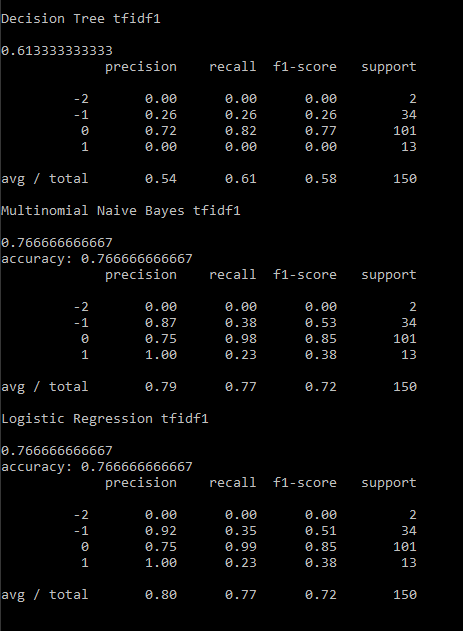

In [121]:
from IPython.display import Image, display

path = "images/tfid1_scores.PNG"
display(Image(path))

### Artifcial dataset

In [122]:
############## TFID Artifcial Dataset ##############

from src.models.nltk_Models.tfid import tfidf1
tfid1_dm    = tfidf1.fit_transform(df1['text'])


train_data_features_tfidf_1         = tfidf1.fit_transform(df1['text'])
train_data_features_toArray_tfidf_1 = train_data_features_tfidf_1.toarray()

df_tfid1    = pd.DataFrame(tfid1_dm.toarray(),
                           columns=tfidf1.get_feature_names())

print 'Data to array... Complete'


from sklearn.cross_validation import train_test_split

X = train_data_features_toArray_tfidf_1

pd.DataFrame(X, columns=tfidf1.get_feature_names())[0:1]

y = df1['score'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size    = 0.3, 
                                                    random_state = 42) #random_state is set seed


from sklearn.cross_validation import train_test_split

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression


DecisionTree0 = DecisionTreeClassifier(criterion       = 'entropy', 
                                       splitter         = 'best',          
                                       max_depth        = 1,      
                                       min_samples_split= 1, 
                                       min_samples_leaf = 1,      
                                       min_weight_fraction_leaf = 0.0 , 
                                       max_features     = None,   
                                       random_state     = 42,      
                                       max_leaf_nodes   = None,   
                                       class_weight     = None,      
                                       presort          = False)

DecisionTree0.fit(X_train, y_train)
tfidf1_D_expected      = y_test
tfidf1_D_predicted     = DecisionTree0.predict(X_test)

# fit a Naive Bayes model to the data
MultinomialNB0 = MultinomialNB()
print MultinomialNB0
MultinomialNB0.fit(X_train, y_train)
tfidf1_M_expected  = y_test
tfidf1_M_predicted = MultinomialNB0.predict(X_test)

# logistic regression model

LogisticRegression0 = LogisticRegression(random_state = 42)
LogisticRegression0.fit(X_train, y_train)
tfidf1_L_expected= y_test
tfidf1_L_predicted = LogisticRegression0.predict(X_test)



# summarize Decision Tree
print '\n Decision Tree testset \n'
print DecisionTree0.score(X_test,y_test)
print("accuracy: " + str(metrics.accuracy_score(tfidf1_D_expected, tfidf1_D_predicted)))
print(metrics.classification_report(tfidf1_D_expected, tfidf1_D_predicted))

# summarize Multinomial Naive Bayes
print '\n Multinomial Naive Bayes testset \n'
print MultinomialNB0.score(X_test, y_test)
print("accuracy: " + str(metrics.accuracy_score(tfidf1_M_expected, tfidf1_M_predicted)))
print(metrics.classification_report(tfidf1_M_expected, tfidf1_M_predicted))

# summarize Logistic Regression
print '\n Logistic Regression testset \n'
print LogisticRegression0.score(X_test, y_test)
print("accuracy: " + str(metrics.accuracy_score(tfidf1_L_expected, tfidf1_L_predicted)))
print(metrics.classification_report(tfidf1_L_expected, tfidf1_L_predicted))

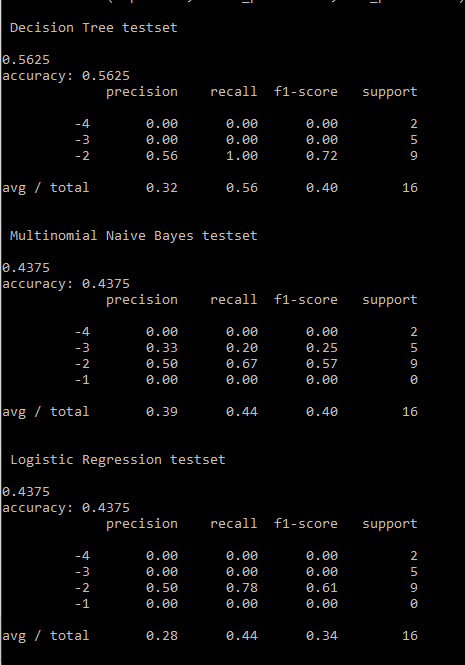

In [123]:
path = "images/testset.PNG"
display(Image(path))

### Merging the artifcial data set with live tweets.
This will help us get a better understanding of how our model will perform in the wild.

In [126]:
df1 = df1.rename(index=str, columns={'text'      :'tweetText5', 
                  'afinn_injuries'         : 'afinn_injuries',
                  'afinn_injuriesNumerical': 'afinn_injuriesNumerical',
                  'afinn_baseSentiment'    : 'afinn_baseSentiment',
                  'afinn_baseNumerical'    : 'afinn_baseNumerical',
                  'score'                  : 'score'})

dfArtifcial = df[['tweetText5', 
                  'afinn_injuries',
                  'afinn_injuriesNumerical', 
                  'afinn_baseSentiment', 
                  'afinn_baseNumerical', 
                  'score']]

dfArtifcial2 = pd.concat([df1,dfArtifcial])
dfArtifcial.shape

(500, 6)

In [127]:
dfArtifcial2.shape

(551, 6)

In [128]:
############## TFID Artifcial Dataset ##############

from src.models.nltk_Models.tfid import tfidf1
tfid1_dm    = tfidf1.fit_transform(dfArtifcial2['tweetText5'])

train_data_features_tfidf_1         = tfidf1.fit_transform(dfArtifcial2['tweetText5'])
train_data_features_toArray_tfidf_1 = train_data_features_tfidf_1.toarray()

df_tfid1    = pd.DataFrame(tfid1_dm.toarray(),
                           columns=tfidf1.get_feature_names())

print 'Data to array... Complete'

from sklearn.cross_validation import train_test_split

X = train_data_features_toArray_tfidf_1

pd.DataFrame(X, columns=tfidf1.get_feature_names())[0:1]

y = dfArtifcial2['score'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size    = 0.3, 
                                                    random_state = 42) #random_state is set seed
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

DecisionTree0 = DecisionTreeClassifier(criterion       = 'entropy', 
                                       splitter         = 'best',          
                                       max_depth        = 1,      
                                       min_samples_split= 1, 
                                       min_samples_leaf = 1,      
                                       min_weight_fraction_leaf = 0.0 , 
                                       max_features     = None,   
                                       random_state     = 42,      
                                       max_leaf_nodes   = None,   
                                       class_weight     = None,      
                                       presort          = False)

DecisionTree0.fit(X_train, y_train)
tfidf1_D_expected      = y_test
tfidf1_D_predicted     = DecisionTree0.predict(X_test)

# fit a Naive Bayes model to the data
MultinomialNB0 = MultinomialNB()
print MultinomialNB0
MultinomialNB0.fit(X_train, y_train)
tfidf1_M_expected  = y_test
tfidf1_M_predicted = MultinomialNB0.predict(X_test)

# logistic regression model

LogisticRegression0 = LogisticRegression(random_state = 42)
LogisticRegression0.fit(X_train, y_train)
tfidf1_L_expected= y_test
tfidf1_L_predicted = LogisticRegression0.predict(X_test)

# summarize Decision Tree
print '\n Decision Tree dfArtifcial2 \n'
print DecisionTree0.score(X_test,y_test)
print("accuracy: " + str(metrics.accuracy_score(tfidf1_D_expected, tfidf1_D_predicted)))
print(metrics.classification_report(tfidf1_D_expected, tfidf1_D_predicted))

# summarize Multinomial Naive Bayes
print '\n Multinomial Naive Bayes dfArtifcial2 \n'
print MultinomialNB0.score(X_test, y_test)
print("accuracy: " + str(metrics.accuracy_score(tfidf1_M_expected, tfidf1_M_predicted)))
print(metrics.classification_report(tfidf1_M_expected, tfidf1_M_predicted))

# summarize Logistic Regression
print '\n Logistic Regression dfArtifcial2\n'
print LogisticRegression0.score(X_test, y_test)
print("accuracy: " + str(metrics.accuracy_score(tfidf1_L_expected, tfidf1_L_predicted)))
print(metrics.classification_report(tfidf1_L_expected, tfidf1_L_predicted))

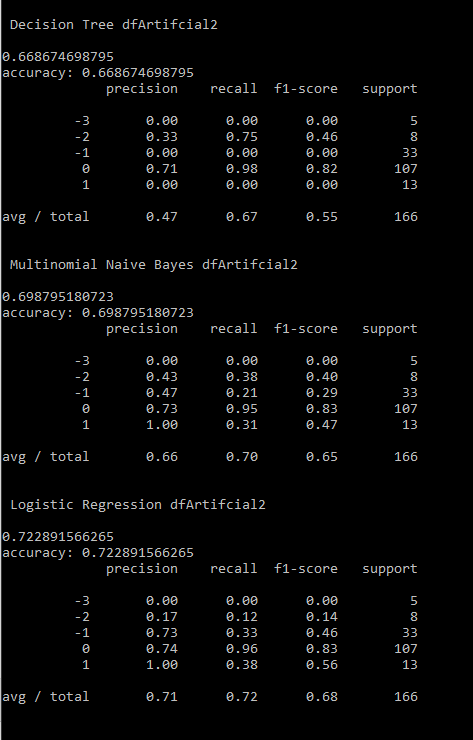

In [104]:
path = "images/Artifcial.PNG"
display(Image(path))

### STEMMING NOT QUITE WORKING YET.

In [105]:
from src.modules.afinn_injury_STEM import afinn_injury_PorterStemmer
#from src.modules.afinn_injury_STEM import afinn_injury_SnowBall, afinn_injury_nummerical_SnowBall

#df['afinn_injuries_Porter']          = map(lambda x: afinn_injury_PorterStemmer(x), df['stemTextPorter'])
# df['afinn_injuriesNumerical_Porter'] = map(lambda x: afinn_injury_nummerical_PorterStemmer(x), df['afinn_injuries_Porter'])

# df['afinn_injuries_SnowBall']          = map(lambda x: afinn_injury_SnowBall(x), df['stemTextSnowBall'])
# df['afinn_injuriesNumerical_SnowBall'] = map(lambda x: afinn_injury_nummerical_SnowBall(x), df['afinn_injuries_SnowBall'])
# df.head(2)

# df['afinn_injuries']          = map(lambda x: afinn_injury_PorterStemmer(x), df['tweetText5'])
# df['afinn_injuriesNumerical'] = map(lambda x: afinn_injury_nummerical_PorterStemmer(x), df['afinn_injuries'])

# df['afinn_baseSentiment'] = map(lambda x: afinn_sent(x), df['tweetText5'])
# df['afinn_baseNumerical'] = map(lambda x: afinn_nummerical(x), df['afinn_baseSentiment'])